# Python 101 : Introduction to Google Colab
by Limpapat Bussaban

22/08/2021

In [1]:
# Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Python version
!python2 --version
!python3 --version

Python 2.7.17
Python 3.7.11


In [3]:
# Help
?print

In [4]:
# Zen of Python
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [5]:
print("hello world")

hello world


In [6]:
print("hello"+"world")
print("hello" + " " + "world")
print("hello", "world")
"Colab is easy"

helloworld
hello world
hello world


'Colab is easy'

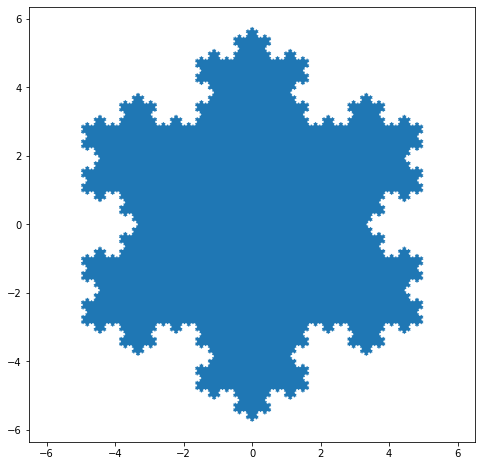

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
  """
  Return two lists x, y of point coordinates of the Koch snowflake.

  Parameters
  ----------
  order : int
      The recursion depth.
  scale : float
      The extent of the snowflake (edge length of the base triangle).
  """
  def _koch_snowflake_complex(order):
      if order == 0:
          # initial triangle
          angles = np.array([0, 120, 240]) + 90
          return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
      else:
          ZR = 0.5 - 0.5j * np.sqrt(3) / 3

          p1 = _koch_snowflake_complex(order - 1)  # start points
          p2 = np.roll(p1, shift=-1)  # end points
          dp = p2 - p1  # connection vectors

          new_points = np.empty(len(p1) * 4, dtype=np.complex128)
          new_points[::4] = p1
          new_points[1::4] = p1 + dp / 3
          new_points[2::4] = p1 + dp * ZR
          new_points[3::4] = p1 + dp / 3 * 2
          return new_points

  points = _koch_snowflake_complex(order)
  x, y = points.real, points.imag
  return x, y

#@title Koch snowflake
order =  6 #@param {type:"slider", min:1, max:10, step:1}
scale =  10 #@param {type:"integer"}
x, y = koch_snowflake(order=order, scale=scale)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()